In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [35]:
def deltaZ(z: np.ndarray, indexZ: int):
    res = z[0][indexZ + 1] - z[0][indexZ]
    return res


def deltaZ0(z: np.ndarray, indexZ: int):
    res = deltaZ(z, indexZ - 1) + deltaZ(z, indexZ)
    res /= 2.0
    return res

def df(x: np.ndarray, z: np.ndarray):
    res = -np.sin(x) * np.cos(z)
    return res


def f(x: float, z: float):
    res = math.cos(x)
    return res


def g(x: float, z: float):
    res = math.sin(z)
    return res

def g12(x: np.ndarray, indexX: int, z: np.ndarray, indexZ: int):
    res = deltaZ(z, indexZ - 1) *\
            (g(x[indexX + 1][0], z[0][indexZ + 1]) + g(x[indexX][0], z[0][indexZ + 1])) + \
          deltaZ(z, indexZ) *\
            (g(x[indexX + 1][0], z[0][indexZ]) + g(x[indexX][0], z[0][indexZ]))
    res /= (4 * deltaZ0(z, indexZ))
    return res


In [36]:
minX = -10
maxX = 10
sizeX = 100
lengthX = maxX - minX
dx = lengthX / (sizeX - 1)

x = np.linspace(minX, maxX, sizeX)

maxZmod = 10
sizeZ = 100
lengthZ = 2 * maxZmod

z = np.linspace(-1, 1, sizeZ)
z = (np.divide(2.0, 1 + np.exp(-5 * z)) - 1.0) * maxZmod

#plt.plot(np.linspace(-1.0, 1.0, sizeZ), z)

z, x = np.meshgrid(z, x)


#dzExact = df(x, y)
#dz = np.copy(dzExact)
dyExact = df(x, z)
dy = np.copy(dyExact)

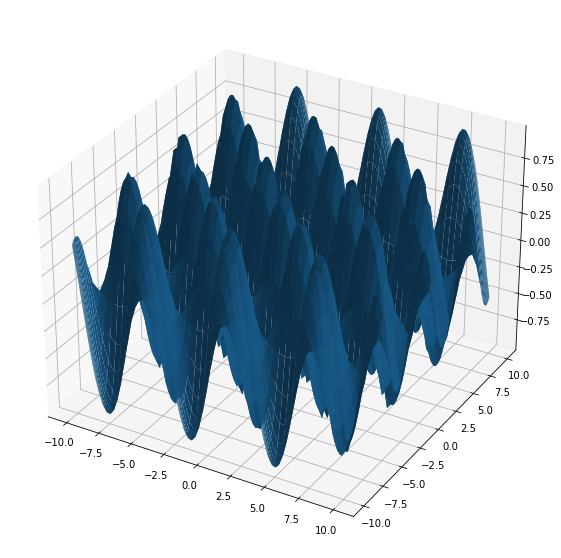

In [37]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, z, dyExact)

In [38]:
for i in range(1, sizeX - 1):
    for k in range(1, sizeZ - 1):
        dy[i][k] = f(x[i - 1][0], z[0][k - 1]) * deltaZ(z, k)**2 * g12(x, i - 1, z, k - 1) +\
                   f(x[i - 1][0], z[0][k]) * (2 * deltaZ(z, k - 1) * deltaZ(z, k) * (g12(x, i - 1, z, k - 1) - g12(x, i - 1, z, k)) 
                                              - deltaZ(z, k)**2 * g12(x, i - 1, z, k - 1) + deltaZ(z, k - 1)**2 * g12(x, i - 1, z, k)) +\
                   f(x[i - 1][0], z[0][k + 1]) * (-deltaZ(z, k - 1)**2 * g12(x, i - 1, z, k)) +\
                   f(x[i][0], z[0][k - 1]) * (-deltaZ(z, k)**2 * g12(x, i - 1, z, k - 1) + deltaZ(z, k)**2 * g12(x, i, z, k - 1)) +\
                   f(x[i][0], z[0][k]) * (2 * deltaZ(z, k - 1) * deltaZ(z, k) * (-g12(x, i - 1, z, k - 1) + g12(x, i - 1, z, k) + g12(x, i, z, k - 1) - g12(x, i, z, k)) +
                                          deltaZ(z, k)**2 * g12(x, i - 1, z, k - 1) - deltaZ(z, k - 1)**2 * g12(x, i - 1, z, k) - deltaZ(z, k)**2 * g12(x, i, z, k - 1) + deltaZ(z, k - 1)**2 * g12(x, i, z, k)) +\
                   f(x[i][0], z[0][k + 1]) * (deltaZ(z, k - 1)**2 * g12(x, i - 1, z, k) - deltaZ(z, k - 1)**2 * g12(x, i, z, k)) +\
                   f(x[i + 1][0], z[0][k - 1]) * (-deltaZ(z, k)**2 * g12(x, i, z, k - 1)) +\
                   f(x[i + 1][0], z[0][k]) * (2 * deltaZ(z, k - 1) * deltaZ(z, k) * (g12(x, i, z, k) - g12(x, i, z, k - 1)) 
                                              + deltaZ(z, k)**2 * g12(x, i, z, k - 1) - deltaZ(z, k - 1)**2 * g12(x, i, z, k)) +\
                   f(x[i + 1][0], z[0][k + 1]) * (deltaZ(z, k - 1)**2 * g12(x, i, z, k))
        dy[i][k] /= (4 * dx * deltaZ0(z, k) * deltaZ(z, k - 1) * deltaZ(z, k))


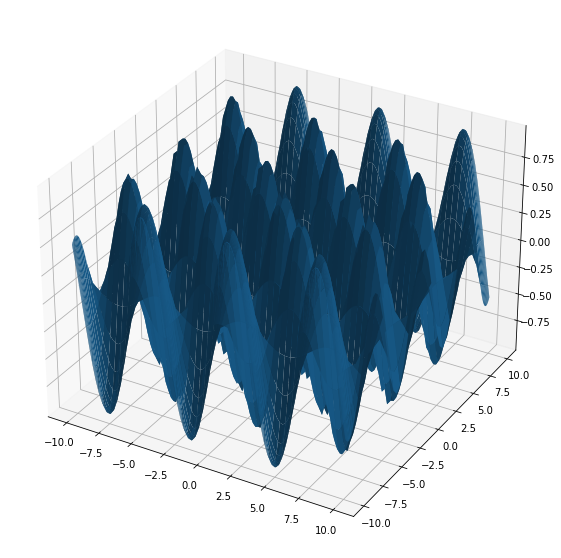

In [39]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, z, dy)

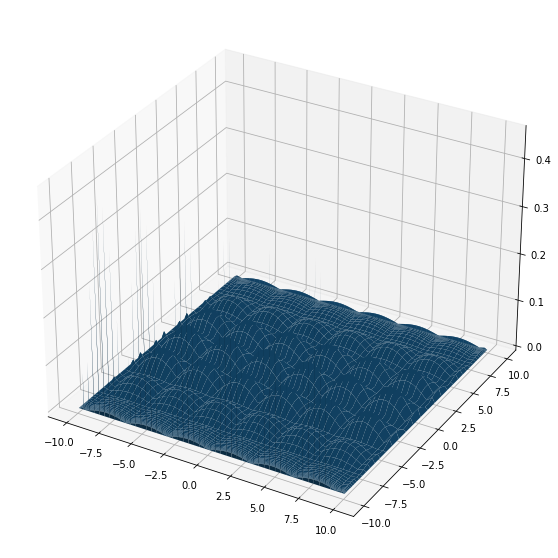

In [40]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, z, np.abs(dy - dyExact))